# United Kingdom road accident data analysis 2009-2014

## Introduction

The United Kingdom government maintains several robust and easy-access data on multiple subjects, including road accident data. In the last 30 years the population size and traffic levels massively increased, traffic accident reports benefit the understanding of how it affected the population and guide measures to reduce future accidents (Department for Transport, 2022).
The purpose of this report is to extract and display meaningful information from the United Kingdom road accident data, achieved by applying time series methods to describe the number of casualties over time and perform forecasts. Also, applying different clustering algorithms to group the data into different patterns that can be recognized. 

# Data preparation

## Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import scipy
from tqdm import tqdm_notebook
pd.set_option('display.max_columns', 50)

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import axes
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)
import matplotlib.dates as mdates
import plotly.express as px


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import confusion_matrix             
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

## Data characterisation

In [2]:
UK_Accident = pd.read_csv("UK_Accident.csv")

In [3]:
UK_Accident

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,1,22:20,917,S12000006,2,74,Dual carriageway,70,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,5,06:40,917,S12000006,2,74,Dual carriageway,70,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,3,02:00,917,S12000006,4,721,Single carriageway,40,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,4,06:55,917,S12000006,3,75,Single carriageway,60,Giveway or uncontrolled,5,43,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [4]:
UK_Accident.shape

(1504150, 33)

In [5]:
UK_Accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

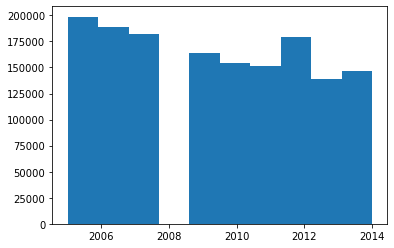

In [6]:
plt.hist(UK_Accident["Year"])
plt.show()

A first glance at the dataset shows a massive number of observations, more than one and a half million, distributed in 33 features, being them both numerical and categorical. The histogram of the years above reveals in addition to a decreasing tendency of the number of accidents, the unavailability of data for the year 2008.

[Text(0.5, 0, 'Days of the Week'),
 Text(0.5, 1.0, 'Accidents per day of the week')]

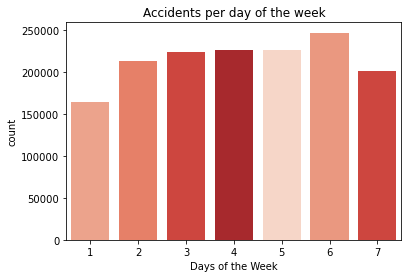

In [7]:
dev_color= UK_Accident.Day_of_Week.argsort().argsort()
pal= sns.color_palette('Reds', len(dev_color))
p = sns.countplot(x="Day_of_Week", 
              data=UK_Accident,
              palette=np.array(pal[::])[dev_color]) 
p.set(xlabel='Days of the Week', title= "Accidents per day of the week")


The number of accidents seems stable over the days of the week with a peak of Fridays, being the day of the week with the highest number of accidents. Sunday in other way is the day with the least amount of accidents.

In [8]:
A = UK_Accident.assign(Area =pd.cut(UK_Accident['Urban_or_Rural_Area'], 
                               bins=[0, 1.5, 2.5, 9999], 
                               labels=['Urban', 'Rural', 'Unknow']),
               Severity =pd.cut(UK_Accident['Accident_Severity'], 
                               bins=[0, 1.5, 2.5, 9999], 
                               labels=['Fatal', 'Serious', 'Slight']) )

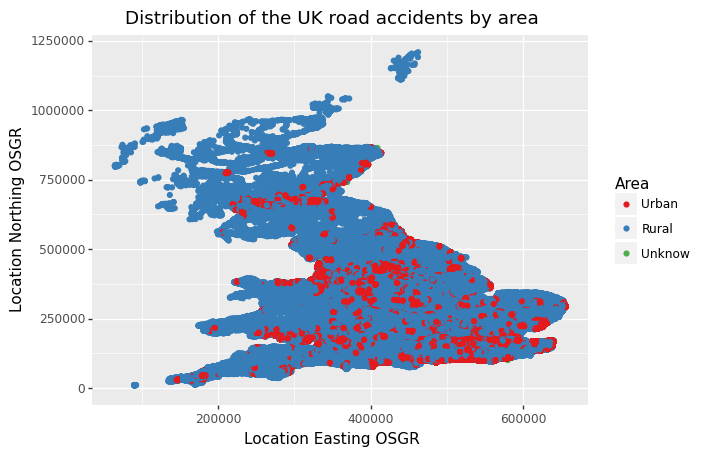

<ggplot: (118608883065)>

In [41]:
from plotnine import ggplot, aes, geom_point, scale_colour_brewer, labs
(
ggplot(A)
+ aes(x="Location_Easting_OSGR",y="Location_Northing_OSGR",colour= "Area")
+ geom_point()
+ scale_colour_brewer(  type = "qual", palette = 6)
+ labs(title ="Distribution of the UK road accidents by area",x = "Location Easting OSGR", y = "Location Northing OSGR")
)

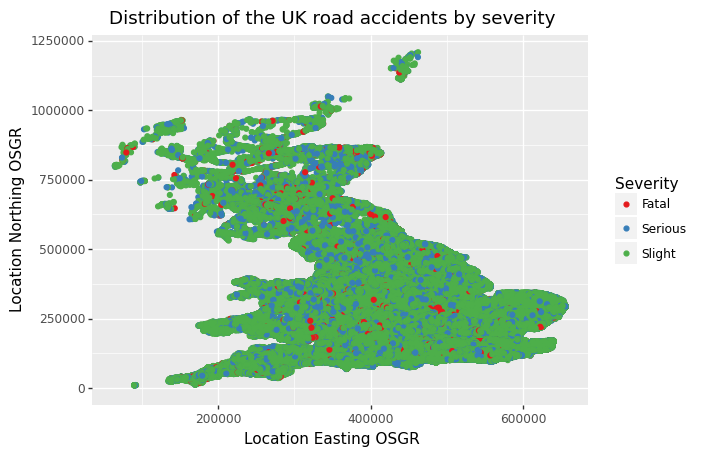

<ggplot: (118763435024)>

In [42]:
(
ggplot(A)
+ aes(x="Location_Easting_OSGR",y="Location_Northing_OSGR",colour= "Severity")
+ geom_point()
+ scale_colour_brewer(  type = "qual", palette = 6)
+ labs(title ="Distribution of the UK road accidents by severity",x = "Location Easting OSGR", y = "Location Northing OSGR")
)

The two plots above show the distribution of accidents, comparing rural to urban and by the severity of the accident as well. It is noticeable that the fatal accident points are more present, however not uniquely, in the urban areas.

## Data cleaning

In [9]:
UK_Accident = UK_Accident.loc[UK_Accident["Year"] >= 2009]

In [10]:
UK_A = UK_Accident.drop(columns =["Unnamed: 0", "Accident_Index", "LSOA_of_Accident_Location", "Year", "Local_Authority_(Highway)", "1st_Road_Class", "1st_Road_Number", "2nd_Road_Class", "2nd_Road_Number", "Local_Authority_(District)", "Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude", "Latitude","Time", 'Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control',
                                     'Pedestrian_Crossing-Physical_Facilities', 'Special_Conditions_at_Site', 'Carriageway_Hazards'])

In [11]:
UK_A.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
570011,1,2,2,1,01/01/2009,5,30,Daylight: Street light present,Fine without high winds,Dry,1,Yes
570012,1,2,2,11,05/01/2009,2,30,Daylight: Street light present,Fine without high winds,Wet/Damp,1,Yes
570013,1,3,2,1,04/01/2009,1,30,Daylight: Street light present,Fine without high winds,Dry,1,Yes
570014,1,2,2,1,05/01/2009,2,30,Daylight: Street light present,Other,Frost/Ice,1,Yes
570015,1,2,2,1,06/01/2009,3,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes


In [12]:
UK_A.shape

(934139, 12)

For the purpose of the report, the features removed are not used, the analysis is also focused on accidents from 2009 to 2014.

In [13]:
UK_A.isnull().sum()

Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Speed_limit                                    0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
dtype: int64

In [14]:
UK_A = UK_A.dropna(axis=0)

In [15]:
UK_A.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
570011,1,2,2,1,01/01/2009,5,30,Daylight: Street light present,Fine without high winds,Dry,1,Yes
570012,1,2,2,11,05/01/2009,2,30,Daylight: Street light present,Fine without high winds,Wet/Damp,1,Yes
570013,1,3,2,1,04/01/2009,1,30,Daylight: Street light present,Fine without high winds,Dry,1,Yes
570014,1,2,2,1,05/01/2009,2,30,Daylight: Street light present,Other,Frost/Ice,1,Yes
570015,1,2,2,1,06/01/2009,3,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes


There was a total of 50 missing values in the time column, which was removed by the "dropna" function.

## Feature engineering


In [16]:
UK_A['Speed_limit'].unique()

array([30, 20, 50, 40, 70, 60, 10, 15], dtype=int64)

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
UK_A['Speed_limit'] = le.fit_transform(UK_A['Speed_limit'])

UK_A.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
570011,1,2,2,1,01/01/2009,5,3,Daylight: Street light present,Fine without high winds,Dry,1,Yes
570012,1,2,2,11,05/01/2009,2,3,Daylight: Street light present,Fine without high winds,Wet/Damp,1,Yes
570013,1,3,2,1,04/01/2009,1,3,Daylight: Street light present,Fine without high winds,Dry,1,Yes
570014,1,2,2,1,05/01/2009,2,3,Daylight: Street light present,Other,Frost/Ice,1,Yes
570015,1,2,2,1,06/01/2009,3,3,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes


In [18]:
data = pd.get_dummies (UK_A, columns=['Light_Conditions', 'Weather_Conditions',
                                     'Road_Surface_Conditions',
                                     'Did_Police_Officer_Attend_Scene_of_Accident'], drop_first= True )
data

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Did_Police_Officer_Attend_Scene_of_Accident_Yes
570011,1,2,2,1,01/01/2009,5,3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
570012,1,2,2,11,05/01/2009,2,3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
570013,1,3,2,1,04/01/2009,1,3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
570014,1,2,2,1,05/01/2009,2,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
570015,1,2,2,1,06/01/2009,3,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,07/12/2014,1,7,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1504146,98,3,2,2,11/12/2014,5,7,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1504147,98,3,1,1,09/12/2014,3,4,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1504148,98,2,3,2,17/12/2014,4,6,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


Since machine learning algorithms like clustering can only understand numbers, not text, using a label encoder and one hot encoder we can turn these categorical into numerical values. Label encoder can be applied to the speed limit column since the speed limit has an order of magnitude. That can not be said for the other categorical columns, for those the best approach is the one hot encoding, which creates dummy variables, additional features derived from the number of unique values on each categorical feature (Sethi, A., 2020). 

## Data scaling

In [19]:
X = data.drop(columns = ['Date'], )
y = data['Date']

In [20]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [21]:
X_scaled

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Did_Police_Officer_Attend_Scene_of_Accident_Yes
570011,0.0,0.5,0.015152,0.000000,0.666667,0.428571,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
570012,0.0,0.5,0.015152,0.108696,0.166667,0.428571,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
570013,0.0,1.0,0.015152,0.000000,0.000000,0.428571,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
570014,0.0,0.5,0.015152,0.000000,0.166667,0.428571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
570015,0.0,0.5,0.015152,0.000000,0.333333,0.428571,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,1.0,0.5,0.015152,0.000000,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1504146,1.0,1.0,0.015152,0.010870,0.666667,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1504147,1.0,1.0,0.000000,0.000000,0.333333,0.571429,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1504148,1.0,0.5,0.030303,0.010870,0.500000,0.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Scaling prevents the enormous difference in the range of values of the different features in the dataset from negatively impacting the report, since the difference in range does not relate the relevance of most features(Roy, 2020).

# Time series analysis

A time series is a sequence or series of numerical data points fixed at certain chronological time order. In most cases, a time series is a sequence taken at fixed interval points in time. This allows us to accurately predict or forecast the necessities.

Time series uses line charts to show us seasonal patterns, trends, and relation to external factors. It uses time series values for forecasting and this is called extrapolation.

Time series are used in most of the real-life cases such as weather reports, earthquake prediction, astronomy, mathematical finance, and largely in any field of applied science and engineering. It gives us deeper insights into our field of work and forecasting helps an individual in increasing efficiency of output (Anish).

## Data preparation for time series analysis

 Let's create a new data frame in order to work with time series issues.
 We will be analyzing 'Number of casualties' from 01/01/2009 until 26/12/2014.

In [22]:
df_ts = data.loc[:, ['Date', 'Number_of_Casualties']]
df_ts.rename(columns={'Number_of_Casualties': 'Casualties'}, inplace = True)
df_ts

,Date,Casualties
570011,01/01/2009,1
570012,05/01/2009,11
570013,04/01/2009,1
570014,05/01/2009,1
570015,06/01/2009,1
...,...,...
1504145,07/12/2014,1
1504146,11/12/2014,2
1504147,09/12/2014,1
1504148,17/12/2014,2


In [23]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934139 entries, 570011 to 1504149
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        934139 non-null  object
 1   Casualties  934139 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 21.4+ MB


Next we want to set 'Date' as index. Before doing it, let's transform Dtype 'Date' from object to datetime.

In [24]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

In order to work with time series analysis we want to sum all casualties for a period equal to 1 day.
Next we will be working with the 'ts' data frame.

In [25]:
ts = df_ts.groupby(by=['Date']).agg({'Casualties': 'sum',})
ts.head(-5)

,Casualties
Date,
2009-01-01,360
2009-01-02,458
2009-01-03,437
2009-01-04,596
2009-01-05,812
...,...
2014-12-22,515
2014-12-23,461
2014-12-24,468


In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ts.index, y=ts['Casualties'], name='Before', opacity=1, marker_color='gray'))

fig.update_layout(legend_orientation="v",
                  barmode='overlay',
                  title='Number of Casualties in the UK from 2009 to 2014',
                  title_x=0.5,
                  xaxis_title='Date',
                  yaxis_title='Number of Casualties'
                 )
fig.show()

It could be mentioned that the amount of casualties suddenly decreased in 2013, also the data has seasonality, by the plot above it seems to be in 1 year and less we guess also (check it later).

## Checking for stationarity

Most time series models require the data to be stationary. A time series is said to be stationary if its statistical properties such as mean, variance & covariance remain constant over time. The formal ways to check for this are plotting the data and do a visual analysis and use a statistical test.

Visual: we can use the decomposition method which allows us to separately view seasonality (which could be daily, weekly, annual, etc), trend and random which is the variability in the data set after removing the effects of the seasonality and trend.  The idea beneath seasonal decomposition is to state that any series can be decomposed in a sum (or a product) of 3 components: a trend, a seasonal component, and residuals (Markos).

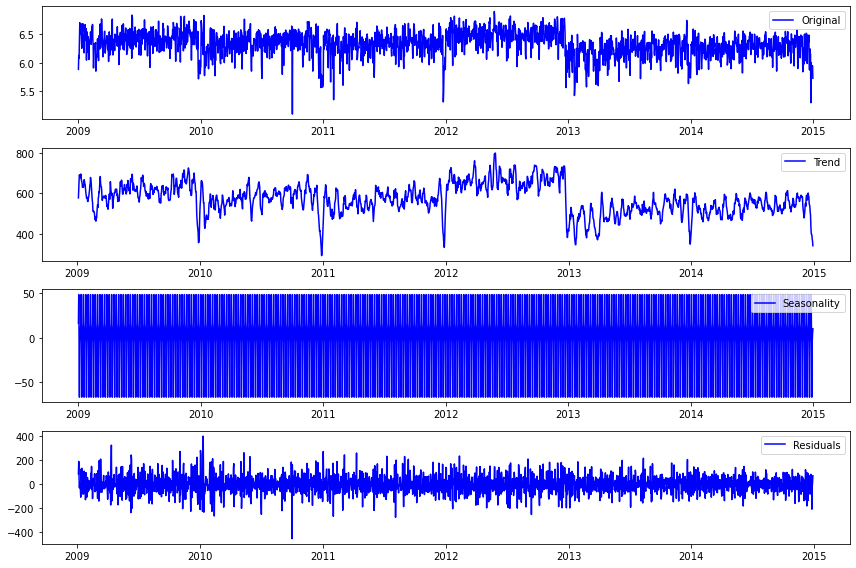

In [27]:
decomposition = seasonal_decompose(ts['Casualties'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts['Casualties']), label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()

 In order to see the seasonality better we are going to lot the last 90 days from the 'ts' data frame using the function `iloc[-90:]`.

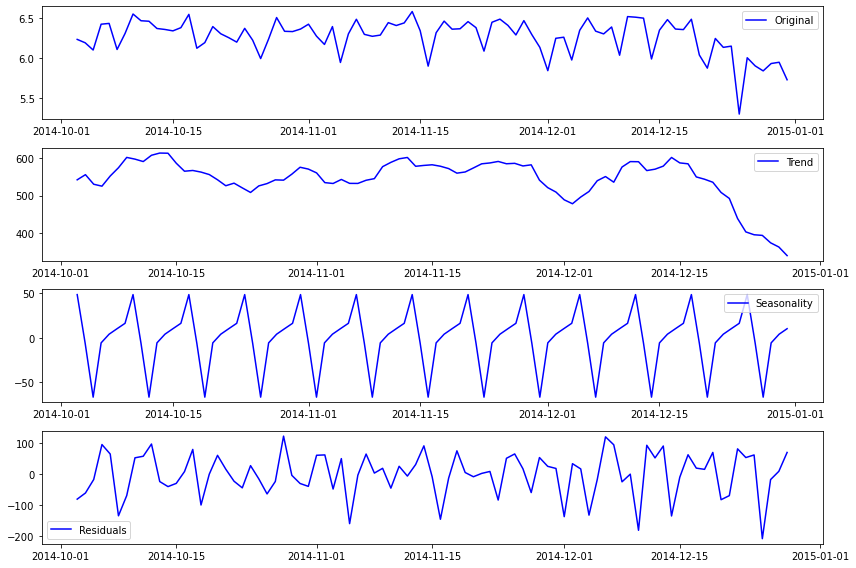

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts['Casualties'].iloc[-90:]), label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend.iloc[-90:], label='Trend', color='blue')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal.iloc[-90:], label='Seasonality', color='blue')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual.iloc[-90:], label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()

        The plot shows that the data has seasonality, but the trend doesn't look clear. But we can't say that the data is stationary.

        To confirm our visual observation on the above plot and solve the question about the stationarity, we will use the Dickey-Fuller Hypothesis testing:

- Null Hypothesis: The series is not stationary.

- Alternate Hypothesis: The series is stationary.

In [29]:
rolmean = ts['Casualties'].rolling(window=7, center = False).mean()
rolstd = ts['Casualties'].rolling(window=7, center = False).std()

dftest=adfuller(ts['Casualties'])

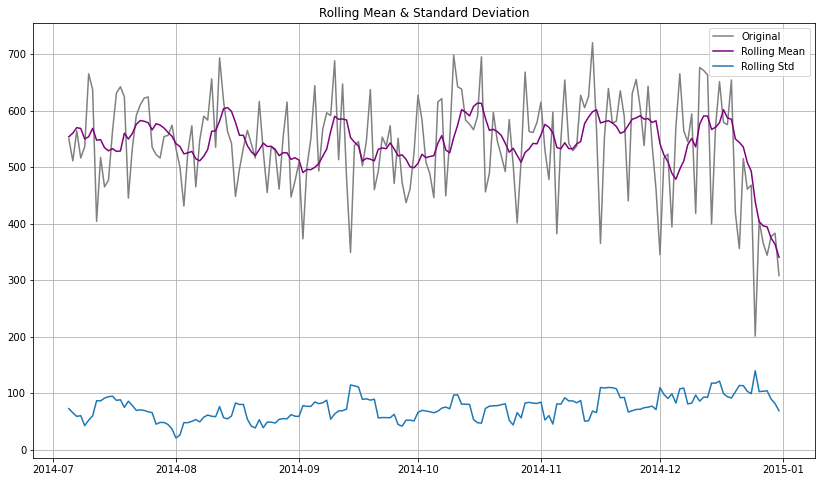

Results of Dickey-Fuller Test:
Test Statistic                   -3.690038
p-value                           0.004255
#Lag Used                        26.000000
Number of Observations Used    2164.000000
Critical Value (1%)              -3.433375
Critical Value (5%)              -2.862877
Critical Value (10%)             -2.567482
dtype: float64


In [30]:
fig = plt.figure(figsize=(14,8))
orig = plt.plot(ts['Casualties'].iloc[-180:], color='grey', label='Original')
mean=plt.plot(rolmean.iloc[-180:], color='purple', label='Rolling Mean')
std = plt.plot(rolstd.iloc[-180:], color='tab:blue', label='Rolling Std')

plt.legend(loc='best')
plt.grid(True)
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value','#Lag Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

**p-value**=0.0043 is less than 0.05, we approved the null hypothesis, it confirms that the 'ts' series is ***stationarity***. Therefore we don't need to remove the trend and can continue working with `ts['Casualties']` time series data.

Create ACF and PACF plots & determine the p and q values.

The Partial Autocorrelation Function ( PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. The Autocorrelation Function gives the correlation of a time series with its own lagged values but without controlling the other lags.

The ACF plot for the AR(p) time series would be strong to a lag of p and remain stagnant for subsequent lag values, trailing off at some point as the effect is weakened. The PACF, on the other hand, describes the direct relationship between an observation and its lag. This generally leads to no correlation for lag values beyond p.

The ACF for the MA(q) process would show a strong correlation with recent values up to the lag of q, then an immediate decline to minimal or no correlation. For the PACF, the plot shows a strong relationship to the lag and then a tailing off to no correlation from the lag onwards. Below is the ACF & PACFplot for our stationary data (Markos).

Now, let us use the Statsmodels library to build auto-correlation (ACF) and partial auto-correlation plots from 
the differenced series. ACF describes how well the present value of the series is related to its past values while PACF finds a correlation of the residuals with the next lag value.

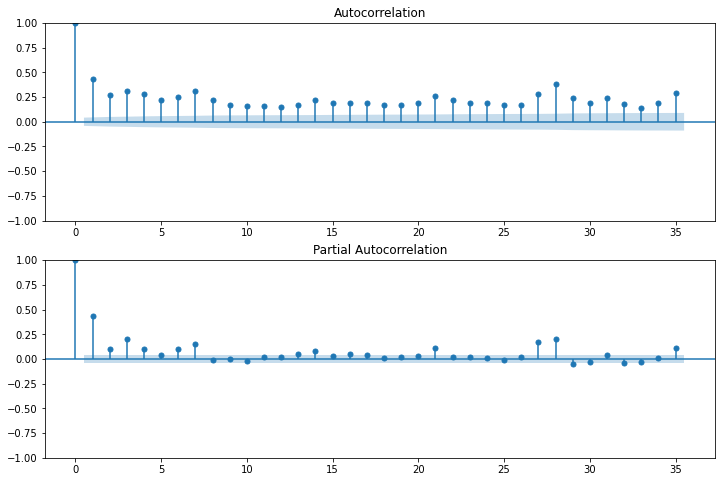

In [31]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts['Casualties'], lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts['Casualties'], lags=35, ax=ax2)


The next step is to run the ARIMA model using the range of values estimated by the ACF & PACF. Information criterion like AIC (Akaike Information Criterion) or BIC(Bayesian Information Criterion) will be used to choose among correctly fitted models.

## Auto ARIMA model

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time-series data to better understand the data set or predict future trends. A statistical model is autoregressive if it predicts future values based on past values.

We can split the ARIMA term into three terms, AR, I, MA:

**AR(p)** stands for the autoregressive model, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead.

**I(d)** is the differencing part, the d parameter tells how many differencing orders are going to be used to make the series stationary.

**MA(q)** stands for moving average model, the q is the number of lagged forecast error terms in the prediction equation. SARIMA is a seasonal ARIMA and it is used with time series with seasonality (Prasad).

ARIMA models should be used on stationary data only.

### Parameters

The advantage of using Auto ARIMA over the ARIMA model is that after data preprocessing step we can skip the next steps & directly fit our model. It uses the AIC (Akaike Information Criterion) & BIC(Bayesian Information Criterion) values generated by trying different combinations of p,q & d values to fit the model.

Next we want to apply the model for the last 20 weeks. December is not included, because it's a anomalous month (iloc[-168:-49]).

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[7]             : AIC=1321.935, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1335.241, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7]             : AIC=1296.065, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[7]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[7]             : AIC=1325.364, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=1276.798, Time=0.06 sec
 ARIMA(1,0,0)(2,1,1)[7]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,0)(1,1,1)[7]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(2,1,0)[7]             : AIC=1285.804, Time=0.04 sec
 ARIMA(2,0,0)(2,1,0)[7]             : AIC=1278.778, Time=0.07 sec
 ARIMA(1,0,1)(2,1,0)[7]             : AIC=1278.764, Time=0.11 sec
 ARIMA(0,0,1)(2,1,0)[7]             : AIC=1277.449, Time=0.07 sec
 ARIMA(2,0,1)(2,1,0)[7]             : AIC=1278.323, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1278.792, Time=0.17 sec

Best model:  ARIMA(1,0,0)(2,1,0)[7]          
T

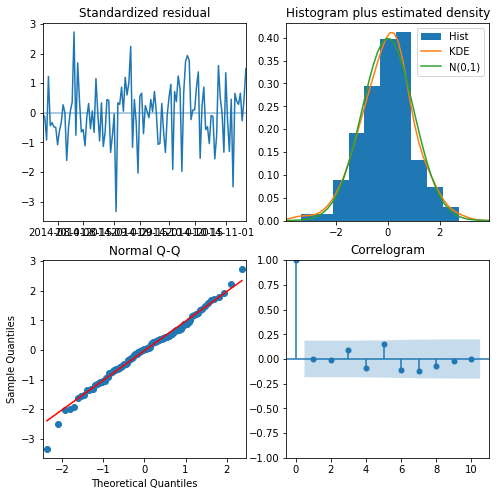

In [32]:
a_arima = pm.auto_arima(ts['Casualties'].iloc[-168:-49], start_p=1, start_q=1,
                       test='adf',
                       max_p=5, max_q=5,
                       m=7,
                       d=0,
                       seasonal=True,
                       start_P=0, start_Q=0,
                       D=1,
                        solver='lbfgs',
                        information_criterion='aic',
                        alpha=0.05,
                        scoring='mse',
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True,with_intercept=False)

print(a_arima.summary())
a_arima.plot_diagnostics(figsize=(8,8))
plt.show()

**Histogram plus estimated density plot**: the orange KDE line follows closely with the N(0,1) line. This is a good indication that the residuals are normally distributed.

**The Q-Q-plot**: shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). This is an indication that the residuals are normally distributed.

**The standardize residual plot**: the residuals over time don’t display any obvious seasonality and appear to be white noise.

**The Correlogram plot**: shows that the time series residuals have low correlation with lagged versions of itself.

### Forecasting

Before applying models we want to split the data into train and test.

In [33]:
ts_f = df_ts.groupby(by=['Date']).agg({'Casualties': 'sum',})
ts_f.head(-5)

,Casualties
Date,
2009-01-01,360
2009-01-02,458
2009-01-03,437
2009-01-04,596
2009-01-05,812
...,...
2014-12-22,515
2014-12-23,461
2014-12-24,468


Next we want to apply the model for the last 20 weeks. December is not included, because it's a anomalous month.
We are going to include for the test data the last 3 weeks (=21 days). Let's split the ts data frame to train and test.

In [34]:
ts_train = ts_f.iloc[-168:-49]
ts_test = ts_f.iloc[-49:-28]

ts_train.shape, ts_test.shape

((119, 1), (21, 1))

In [35]:
y_ts = ts_test.copy()
fit_sar = SARIMAX(np.asarray(ts_train['Casualties']), order = (1, 0, 0), seasonal_order = (2, 1, 0, 7)).fit()
y_ts['sar'] = fit_sar.forecast(len(ts_test))

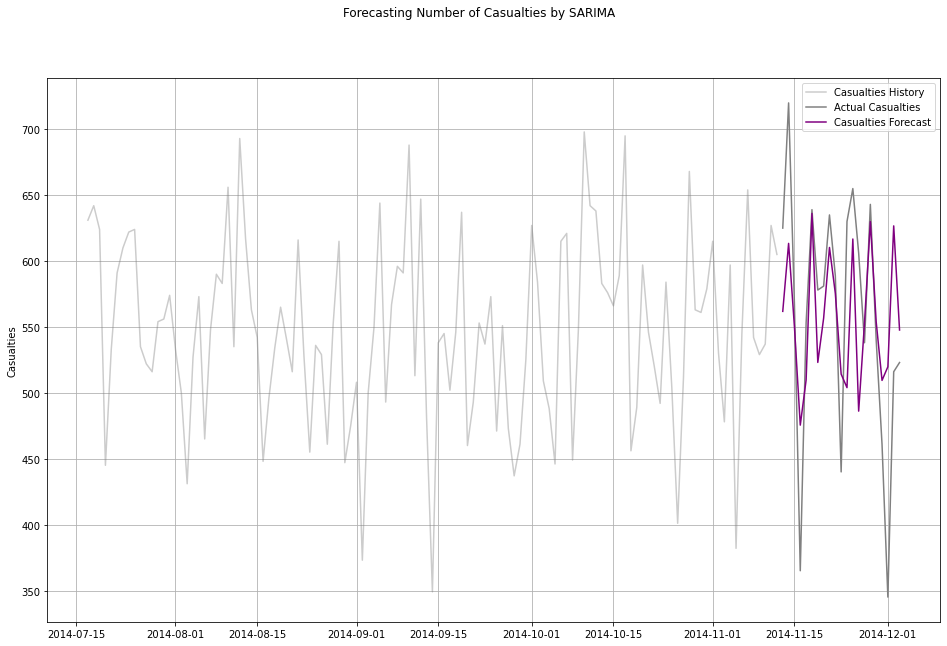

In [36]:
fig = plt.figure(figsize = (16, 10))
fig.suptitle('Forecasting Number of Casualties by SARIMA')
fig.subplots_adjust(hspace = .2)

past, = plt.plot(ts_train['Casualties'], color='grey', label = 'Casualties History', alpha=0.4)
future, = plt.plot(ts_test['Casualties'], color='grey', label = 'Actual Casualties', alpha=1)
predicted_future, = plt.plot(y_ts['sar'], color='purple', label = 'Casualties Forecast')

plt.legend(handles = [past, future, predicted_future])
plt.grid(True)
plt.ylabel('Casualties')

plt.show()

In [37]:
# Create a dataframe to store r2 score
evaluation_results_sar = pd.DataFrame({'r2_score': r2_score(ts_test['Casualties'], y_ts.sar)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results_sar['mean_absolute_error'] = mean_absolute_error(ts_test['Casualties'], y_ts.sar)
evaluation_results_sar['mean_squared_error'] = mean_squared_error(ts_test['Casualties'], y_ts.sar)
evaluation_results_sar['root_mean_squared_error'] = np.sqrt(mean_squared_error(ts_test['Casualties'], y_ts.sar))
evaluation_results_sar['mean_absolute_percentage_error'] = np.mean(np.abs(y_ts.sar - ts_test['Casualties'])
                                                               /np.abs(ts_test['Casualties']))*100 
# Display the results
evaluation_results_sar

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.34226,58.090542,5605.172311,74.867699,11.598599


## Exponential Smoothing

As we mentioned before our data has seasonality, therefore we have to apply **Triple Exponential Smoothing**.

### Parameters

Let's define the function.

In [38]:
# Method to initialise the values
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

# Method to initialise seasonality
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))    
    
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons

# Method to write Triple exponential smoothing
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat

In [39]:
initialize_T(ts['Casualties'], 7)

118.42857142857142

In [40]:
initialize_seasonalilty(ts['Casualties'], 7) 

{0: 16.062072113190336,
 1: 48.260155180282936,
 2: -6.407576449109988,
 3: -66.45869465997266,
 4: -5.560931081697855,
 5: 4.113190324052944,
 6: 9.991784573254218}

In [41]:
# Call Triple exponential smootinh for different values of alpha, beta and gamma
ts['TEF001'] = triple_exp_smoothing(ts['Casualties'], 7, 0, 0, 1)
ts['TEF010'] = triple_exp_smoothing(ts['Casualties'], 7, 0, 1, 0)
ts['TEF100'] = triple_exp_smoothing(ts['Casualties'], 7, 1, 0, 0)

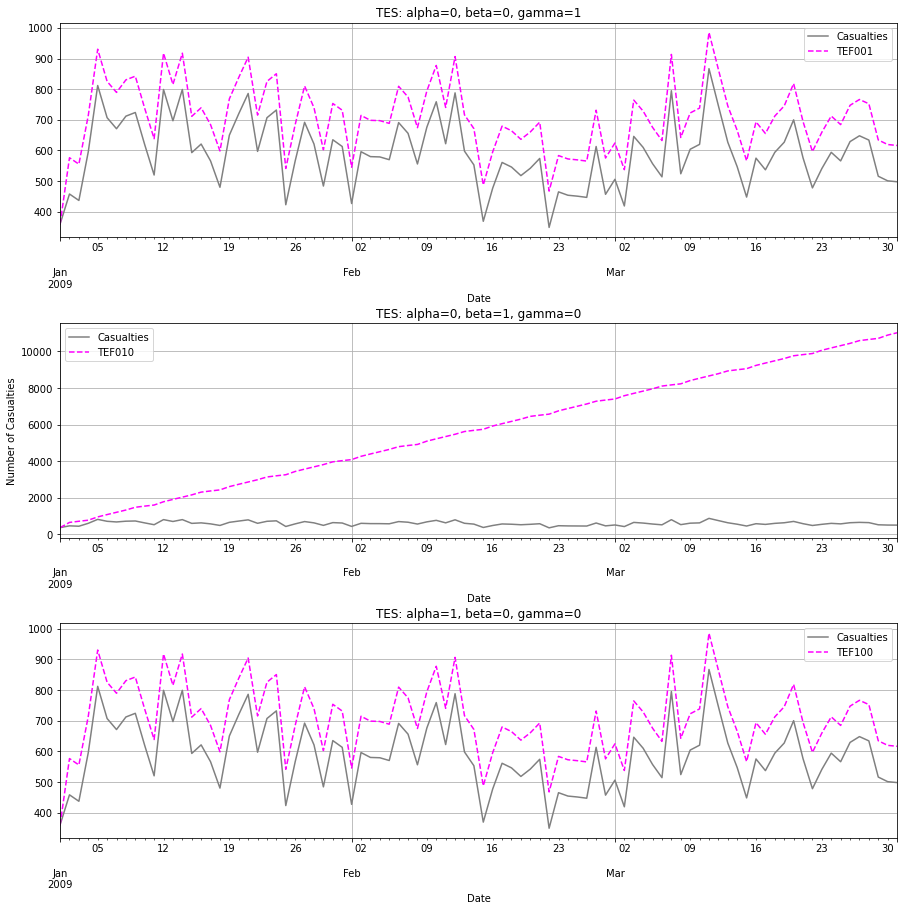

In [42]:
# plot the results for three different cases
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3,1,1)
fig.subplots_adjust(hspace = .4)

ts['Casualties'].iloc[:90].plot(color='grey', linestyle = '-', ax=ax)
ts['TEF001'].iloc[:90].plot(color='fuchsia', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=0, gamma=1')
ax.grid(True)
ax.legend(loc="best")

ax = fig.add_subplot(3,1,2)
ts['Casualties'].iloc[:90].plot(color='grey', linestyle = '-', ax=ax)
ts['TEF010'].iloc[:90].plot(color='fuchsia', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=1, gamma=0')
ax.grid(True)
ax.legend(loc="best")
ax.set_ylabel('Number of Casualties')

ax = fig.add_subplot(3,1,3)
ts['Casualties'].iloc[:90].plot(color='grey', linestyle = '-', ax=ax)
ts['TEF100'].iloc[:90].plot(color='fuchsia', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=0')
ax.grid(True)
ax.legend(loc="best")

In [43]:
ts['TEF110'] = triple_exp_smoothing(ts['Casualties'], 7, 1, 1, 0)
ts['TEF101'] = triple_exp_smoothing(ts['Casualties'], 7, 1, 0, 1)
ts['TEF011'] = triple_exp_smoothing(ts['Casualties'], 7, 1, 1, 1)

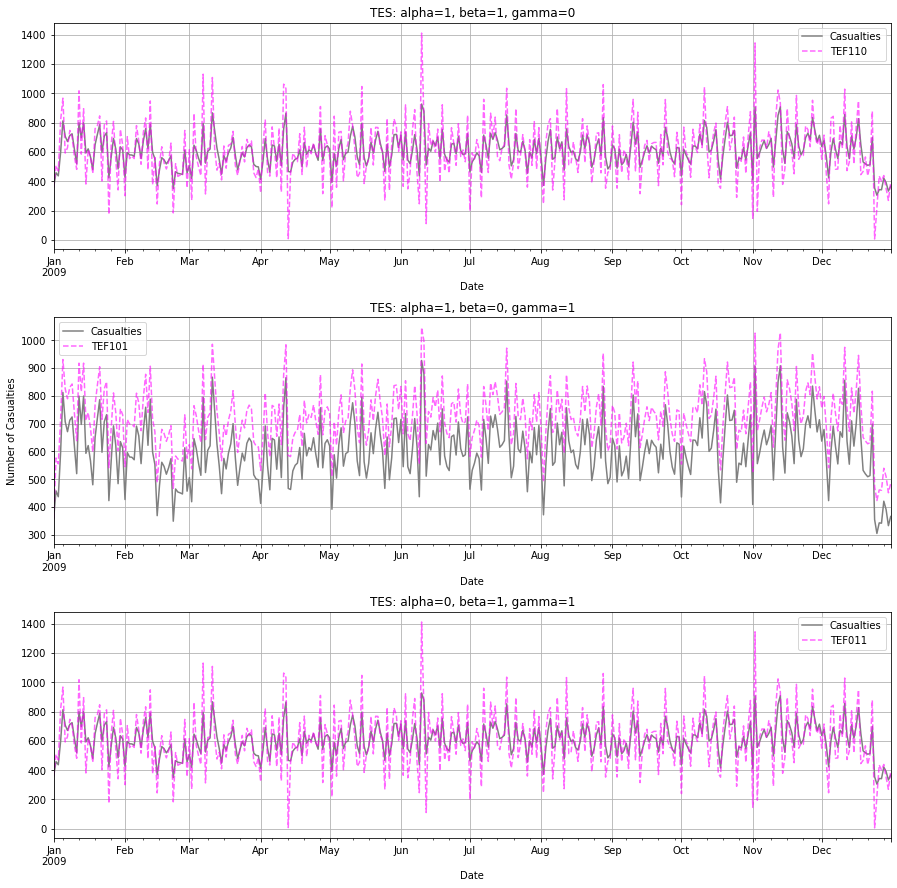

In [44]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3,1,1)
fig.subplots_adjust(hspace = .3)

ts['Casualties'].iloc[:365].plot(color='grey', linestyle = '-', ax=ax)
ts['TEF110'].iloc[:365].plot(color='fuchsia', linestyle = '--', alpha=0.6, ax=ax)
ax.set_title('TES: alpha=1, beta=1, gamma=0')
ax.grid(True)
ax.legend(loc="best")


ax = fig.add_subplot(3,1,2)
ts['Casualties'].iloc[:365].plot(color='grey', linestyle = '-', ax=ax)
ts['TEF101'].iloc[:365].plot(color='fuchsia', linestyle = '--', alpha=0.6, ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=1')
ax.grid(True)
ax.legend(loc="best")
ax.set_ylabel('Number of Casualties')

ax = fig.add_subplot(3,1,3)
ts['Casualties'].iloc[:365].plot(color='grey', linestyle = '-', ax=ax)
ts['TEF011'].iloc[:365].plot(color='fuchsia', linestyle = '--', alpha=0.6, ax=ax)
ax.set_title('TES: alpha=0, beta=1, gamma=1')
ax.grid(True)
ax.legend(loc="best")


Let's apply next parameters:

- m=7 (seasonlenght)
- alpha=0.8
- betta=0.3
- gamma=0.2

In [45]:
ts['TES'] = triple_exp_smoothing(ts['Casualties'], 7, 0.8, 0.3, 0.2)

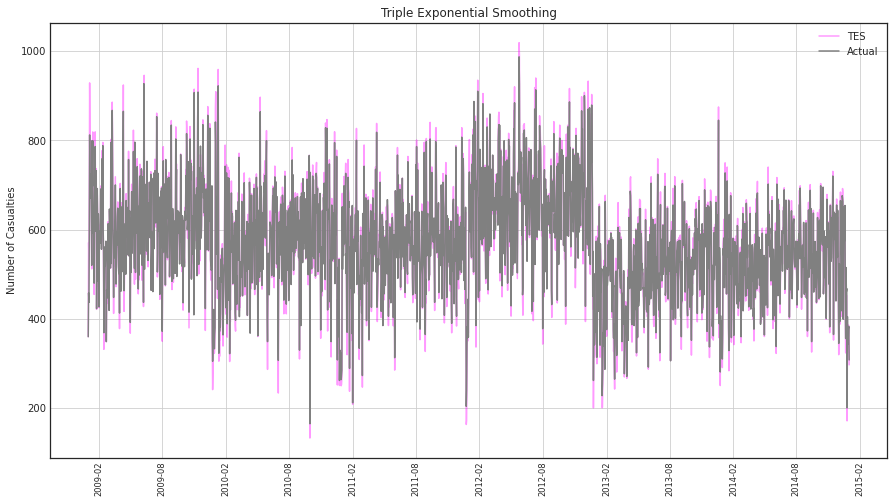

In [46]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(15, 8))
    
    plt.plot(ts['TES'], label="TES", color='fuchsia', alpha=0.4)
    plt.plot(ts['Casualties'], "c", label = "Actual", color='grey', alpha=1)
    
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Triple Exponential Smoothing")
    plt.grid(True)
    plt.ylabel('Number of Casualties')
    
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=180))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.xticks(rotation=90, fontweight='light',  fontsize='small',)

The grapth for the first 90 days.

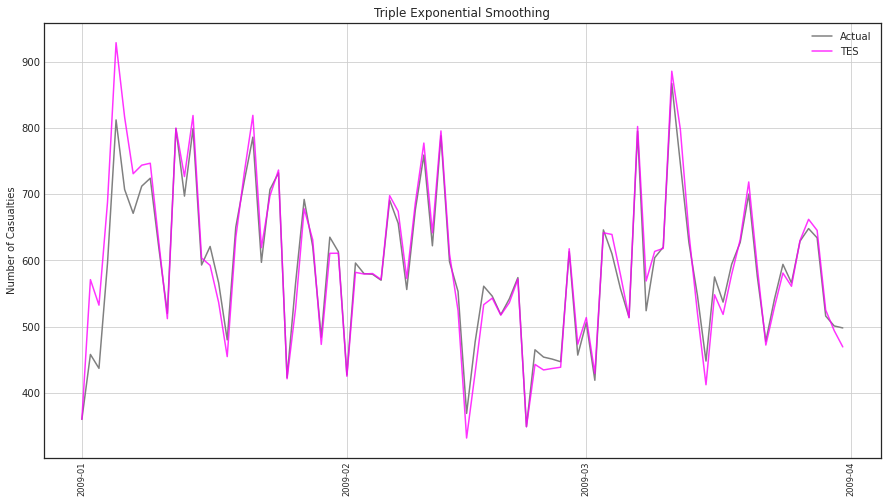

In [47]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(15, 8))
    
    plt.plot(ts['Casualties'].iloc[:90], "c", label = "Actual", color='grey', alpha=1)
    plt.plot(ts['TES'].iloc[:90], label="TES", color='fuchsia', alpha=0.8)
    
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Triple Exponential Smoothing")
    plt.grid(True)
    plt.ylabel('Number of Casualties')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=180))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=90, fontweight='light',  fontsize='small',)

The grapth for the last 90 days.

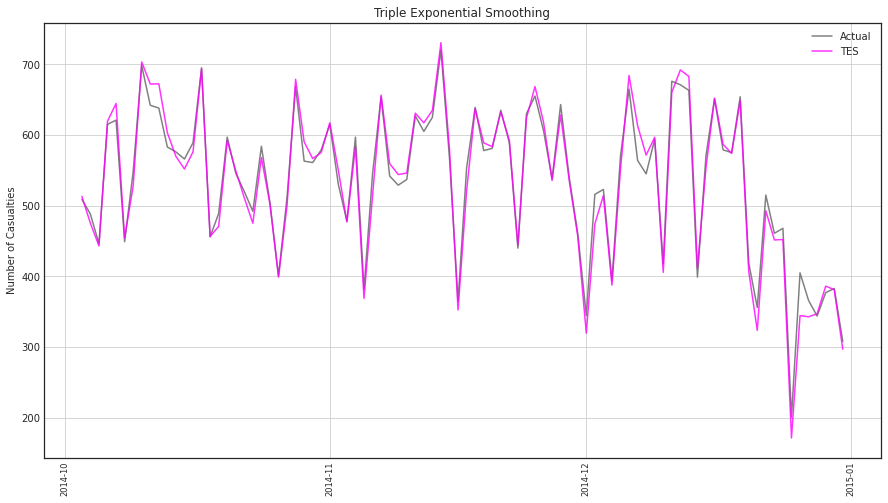

In [48]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(15, 8))
    
    plt.plot(ts['Casualties'].iloc[-90:], "c", label = "Actual", color='grey', alpha=1)
    plt.plot(ts['TES'].iloc[-90:], label="TES", color='fuchsia', alpha=0.8)
    
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Triple Exponential Smoothing")
    plt.grid(True)
    plt.ylabel('Number of Casualties')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=180))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=90, fontweight='light',  fontsize='small',)

### Precision of the modelling

In [49]:
y_ts['tes'] = triple_exp_smoothing(np.asarray(ts_test['Casualties']), 7, 0.8, 0.3, 0.2)

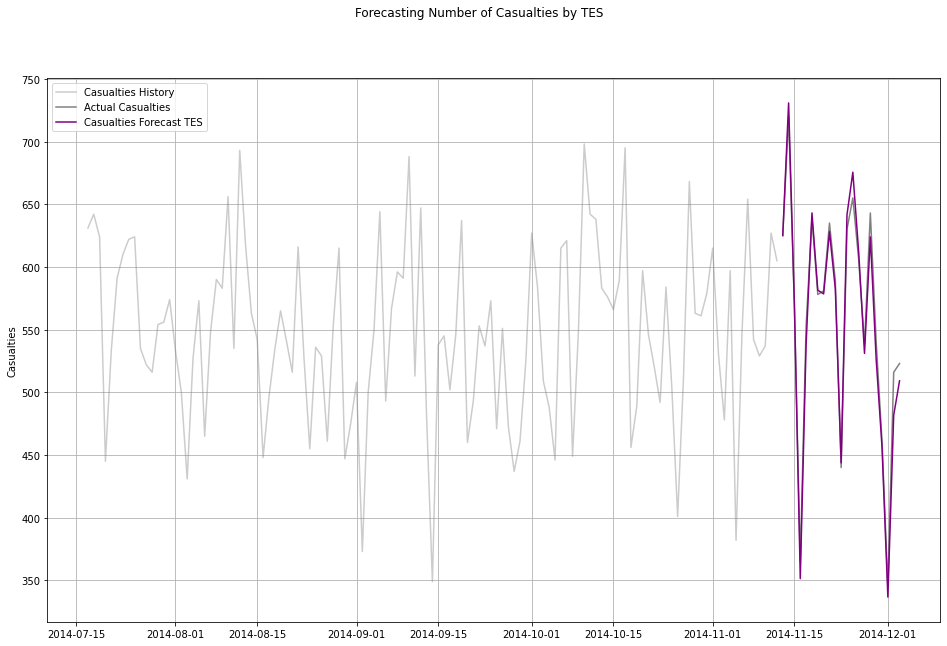

In [50]:
fig = plt.figure(figsize = (16, 10))
fig.suptitle('Forecasting Number of Casualties by TES')
fig.subplots_adjust(hspace = .2)

past, = plt.plot(ts_train['Casualties'], color='grey', label = 'Casualties History', alpha=0.4)
future, = plt.plot(ts_test['Casualties'], color='grey', label = 'Actual Casualties', alpha=1)
predicted_future, = plt.plot(y_ts['tes'], color='purple', label = 'Casualties Forecast TES')

plt.legend(handles = [past, future, predicted_future])
plt.grid(True)
plt.ylabel('Casualties')

plt.show()

In [51]:
# Create a dataframe to store r2 score
evaluation_results_tes = pd.DataFrame({'r2_score': r2_score(ts_test['Casualties'], y_ts.tes)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results_tes['mean_absolute_error'] = mean_absolute_error(ts_test['Casualties'], y_ts.tes)
evaluation_results_tes['mean_squared_error'] = mean_squared_error(ts_test['Casualties'], y_ts.tes)
evaluation_results_tes['root_mean_squared_error'] = np.sqrt(mean_squared_error(ts_test['Casualties'], y_ts.tes))
evaluation_results_tes['mean_absolute_percentage_error'] = np.mean(np.abs(y_ts.tes - ts_test['Casualties'])
                                                               /np.abs(ts_test['Casualties']))*100 
# Display the results
evaluation_results_tes

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.981545,9.85529,157.270305,12.540746,1.826666


## Holt-Winters Exponential Smoothing

Holt-Winters Exponential Smoothening (HWES) works on the idea of smoothening the values of a Univariate Time Series Analysis to use them for forecasting future values. The idea is to assign exponentially decreasing weights giving more importance to more recent incidents (Khan).

Holt-Winter’s model has several parts : a level, a trend, and in the case of a seasonal smoothing, a seasonal component.

In this case we have to use **Triple HWES** for the same reason and it's the **seasonality**.

### Parameters

In [52]:
ts['HWES3_ADD'] = HWES(ts['Casualties'], trend='add', seasonal='add', seasonal_periods=7).fit().fittedvalues
ts['HWES3_MUL'] = HWES(ts['Casualties'], trend='mul', seasonal='mul', seasonal_periods=7).fit().fittedvalues

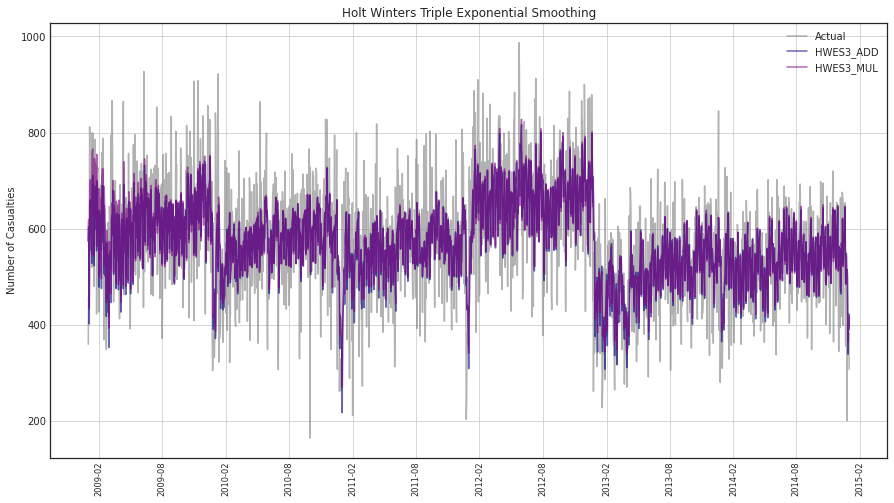

In [53]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(15, 8))
    
    plt.plot(ts['Casualties'], "c", label = "Actual", color='grey', alpha=0.6)
    plt.plot(ts['HWES3_ADD'], label="HWES3_ADD", color='navy', alpha=0.6)
    plt.plot(ts['HWES3_MUL'], label="HWES3_MUL", color='purple', alpha=0.6)
    
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Holt Winters Triple Exponential Smoothing")
    plt.grid(True)
    plt.ylabel('Number of Casualties')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=180))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.xticks(rotation=90, fontweight='light',  fontsize='small',)

The grapth for the first 90 days.

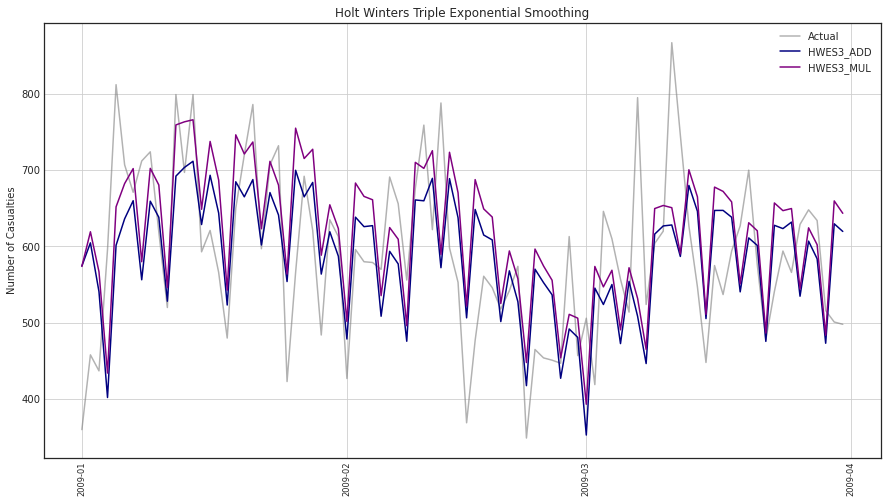

In [54]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(15, 8))
    
    plt.plot(ts['Casualties'].iloc[:90], "c", label = "Actual", color='grey', alpha=0.6)
    plt.plot(ts['HWES3_ADD'].iloc[:90], label="HWES3_ADD", color='navy', alpha=1)
    plt.plot(ts['HWES3_MUL'].iloc[:90], label="HWES3_MUL", color='purple', alpha=1)
    
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Holt Winters Triple Exponential Smoothing")
    plt.grid(True)
    plt.ylabel('Number of Casualties')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=180))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=90, fontweight='light',  fontsize='small',)

The grapth for the last 90 days.

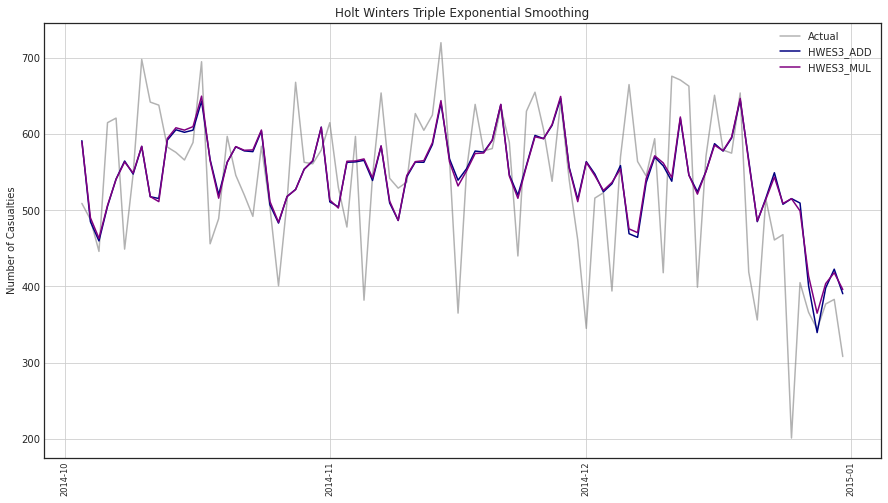

In [55]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(15, 8))
    
    plt.plot(ts['Casualties'].iloc[-90:], "c", label = "Actual", color='grey', alpha=0.6)
    plt.plot(ts['HWES3_ADD'].iloc[-90:], label="HWES3_ADD", color='navy', alpha=1)
    plt.plot(ts['HWES3_MUL'].iloc[-90:], label="HWES3_MUL", color='purple', alpha=1)
    
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Holt Winters Triple Exponential Smoothing")
    plt.grid(True)
    plt.ylabel('Number of Casualties')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=180))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=90, fontweight='light',  fontsize='small',)

### Forecasting

We choose seasonal='mul' parameter for the HWES.

In [56]:
fit_hw = ExponentialSmoothing(np.asarray(ts_train['Casualties']), seasonal_periods=7 , seasonal='mul').fit()
y_ts['HW'] = fit_hw.forecast(len(ts_test))

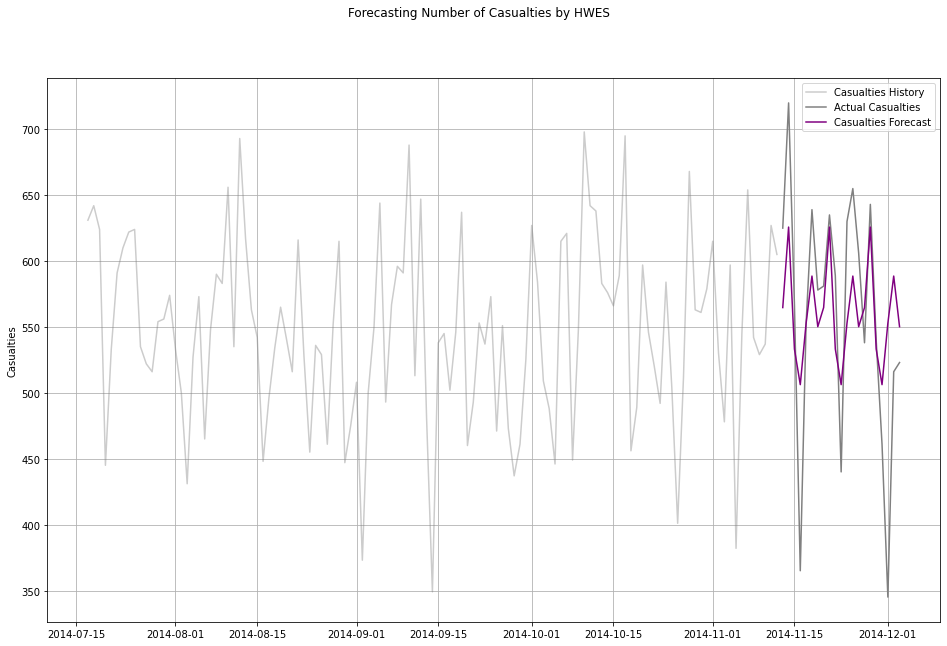

In [57]:
# Plot the training data, the test data and the forecast on the same plot.
fig = plt.figure(figsize = (16, 10))
fig.suptitle('Forecasting Number of Casualties by HWES')
fig.subplots_adjust(hspace = .2)

past, = plt.plot(ts_train['Casualties'], color='grey', label = 'Casualties History', alpha=0.4)
future, = plt.plot(ts_test['Casualties'], color='grey', label = 'Actual Casualties', alpha=1)
predicted_future, = plt.plot(y_ts['HW'], color='purple', label = 'Casualties Forecast')

plt.legend(handles = [past, future, predicted_future])
plt.grid(True)
plt.ylabel('Casualties')

plt.show()

In [58]:
print(fit_hw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  119
Model:             ExponentialSmoothing   SSE                         475616.244
Optimized:                         True   AIC                           1004.896
Trend:                             None   BIC                           1029.908
Seasonal:                Multiplicative   AICC                          1007.363
Seasonal Periods:                     7   Date:                 Sun, 13 Nov 2022
Box-Cox:                          False   Time:                         22:43:55
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0971550                alpha                 True
smoothing_seasonal       

In [59]:
# Create a dataframe to store r2 score
evaluation_results_hw = pd.DataFrame({'r2_score': r2_score(ts_test['Casualties'], y_ts.HW)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results_hw['mean_absolute_error'] = mean_absolute_error(ts_test['Casualties'], y_ts.HW)
evaluation_results_hw['mean_squared_error'] = mean_squared_error(ts_test['Casualties'], y_ts.HW)
evaluation_results_hw['root_mean_squared_error'] = np.sqrt(mean_squared_error(ts_test['Casualties'], y_ts.HW))
evaluation_results_hw['mean_absolute_percentage_error'] = np.mean(np.abs(y_ts.HW - ts_test['Casualties'])
                                                               /np.abs(ts_test['Casualties']))*100 
# Display the results
evaluation_results_hw

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.382307,55.156512,5263.895861,72.552711,11.36628


# Clustering

Clustering algorithms allow the grouping of the data based on feature patterns. Applying that to the UK traffic accident data it is possible to verify if some patterns are related to how these accidents occurs (Kaushik, 2019).

## Principal Component Analysis

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_scaled, test_size=0.05, random_state=0)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.70)
#X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
X_full = pca.fit_transform(X_scaled)

In [31]:
print(X_full.shape)
print(X_scaled.shape)
print(X_test.shape)

(934089, 5)
(934089, 25)
(46705, 5)


Applying principal component analysis the number of features was reduced from 25 to 5, avoiding drawbacks like the curse of dimensionality (Galarnyk, 2017).

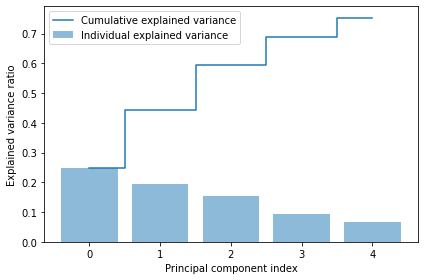

In [32]:
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The graph above displays how much variance of the data each component explains, with the blue line representing the cumulative explained variance. Five components are enough to explain more than 70% of the variance (Galarnyk, 2017).

In [33]:
X_PCA = pd.DataFrame(X_test)
X_full = pd.DataFrame(X_full)

Text(0.5, 1.0, 'Full data scatter plot')

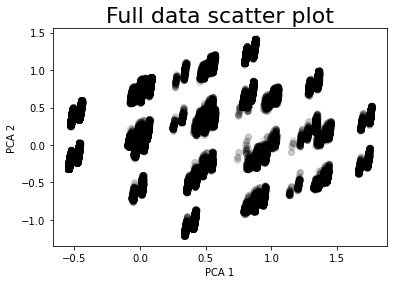

In [34]:
plt.scatter(X_full[0], X_full[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Full data scatter plot", fontsize= 22)

Text(0.5, 1.0, 'Fractioned data scatter plot')

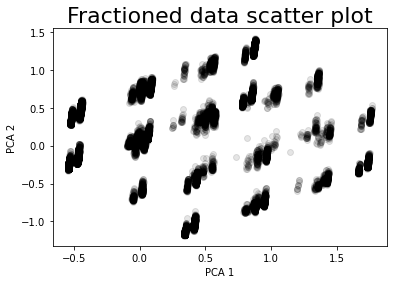

In [35]:
plt.scatter(X_PCA[0], X_PCA[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Fractioned data scatter plot", fontsize= 22)

Both scatter plots above displays the distribution of the first two principal components, being the first one for all observations and the second to a 5% random sample. The relationship between the fractioned data clearly mirror the full size data. The fractioned data reduced size enables similar results for the clustering analysis while requiring less processing power.

## K-means vs DBScan

These two clustering algorithms are very popular and operate in a very distinct method, while K-means operate in a centroid-based partitioning, DBScan is a density-based clustering method. Which method performs better is based on the nature of the dataset (GeeksforGeeks, 2020).

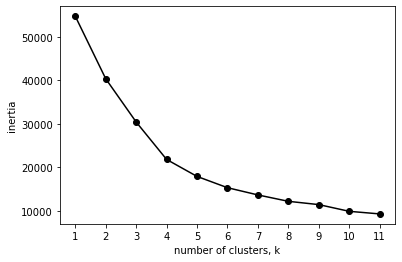

In [36]:
from sklearn.cluster import KMeans
ks = range(1, 12)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_PCA)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The elbow method failed to display a clear number of clusters to be applied for the K-Means, silhouette method, in contrast, is a more robust and computationally intensive method that can lead to a more clear ideal number of clusters to be applied (Kumar, 2021). 

In [56]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_PCA)
    score = silhouette_score(X_PCA, kmeans.labels_)
    silhouette_coefficients.append(score)

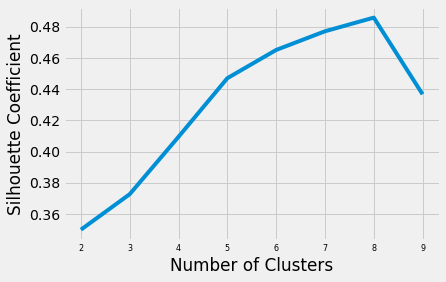

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10), fontsize = 8)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The silhouette method computes the silhouette coefficient of each point, which is a measure of the similarity of its own cluster in comparison to other clusters, the silhouette method indicates that the ideal number of clusters is eight (Kumar, 2021).

### Comparing methods

In [62]:
from sklearn.cluster import DBSCAN
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=8)
dbscan = DBSCAN(eps=0.6)

# Fit the algorithms to the features
kmeans.fit(X_PCA)


KMeans()

In [63]:
dbscan.fit(X_PCA)

DBSCAN(eps=0.6)

In [64]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    X_PCA, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   X_PCA, dbscan.labels_
).round (2)

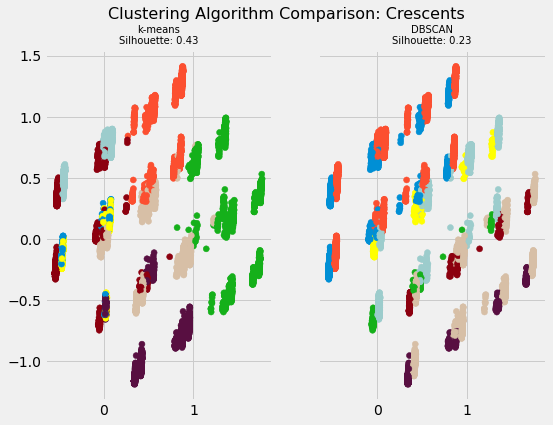

In [75]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
    2: "#D7BFA6",
    3: "#580F41",
    4: "#9CCCCC",
    5: "#8C000F",
    6: "#15B01A",
    7: "#FFFF00",
}

# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(X_PCA[0], X_PCA[1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 10}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(X_PCA[0], X_PCA[1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 10}
)
plt.show()

  

Different algorithms reported different results, different patterns are easily observed by checking the first two principal components. However, the principal parameter for DBScan is the epsilon value, and the ideal value was not applied to this clustering analysis. To decide how close each point should be from each other to be classified as a cluster, the Epsilon value should be set properly (Prado, 2019).

## Selecting the ideal epsilon value for DBSCAN

In [144]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_PCA)
distances, indices = nbrs.kneighbors(X_PCA)

distances, indices = nbrs.kneighbors(X_PCA)

Text(0.5, 1.0, 'NearestNeighbors distance plot')

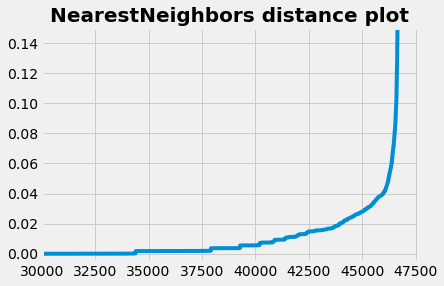

In [143]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlim(30000, 47600)
plt.ylim(-0.005, 0.15)
plt.plot(distances)
plt.title('NearestNeighbors distance plot', fontsize=20,weight="bold")

Observing the graph above the ideal epsilon value seems to be between 0.03 to 0.09, to be sure of which value to use several values between the range of these two numbers need to be evaluated in order to obtain the ideal number of clusters.

In [145]:
min_samples = range(1,10)
eps = np.arange(0.03, 0.09, 0.01) # returns array of ranging from 0.03 to 0.09 with step of 0.01

In [146]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X_PCA).labels_
        score = silhouette_score(X_PCA, labels)
        output.append((ms, ep, score))

In [147]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.6065305708310569
min_samples: 2
eps: 0.08000000000000002


In [134]:
from collections import Counter
labels = DBSCAN(min_samples=min_samples, eps = 0.08).fit(X_PCA).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(X_PCA, labels)}")

Number of clusters: 448
Number of outliers: 188
Silhouette_score: 0.6065305708310569


The best silhouette score indicates epsilon value obtained is 0.08 as the ideal value for the analysis, with 2 minimum samples. With that applied the number of clusters obtained is 446 with 188 outliers.

Text(0.5, 1.0, 'DBScan clustering scatter plot')

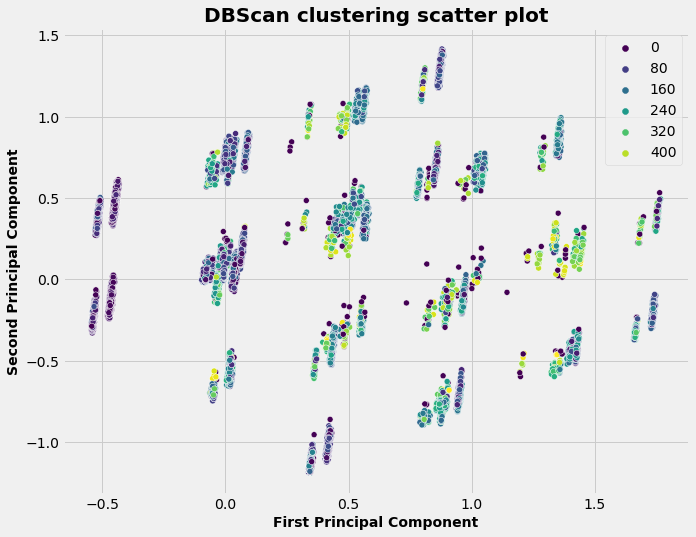

In [140]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(X_PCA[0], X_PCA[1], hue=labels, palette='viridis');
ax.set_xlabel("First Principal Component", size=14, weight="bold")
ax.set_ylabel("Second Principal Component", size=14, weight="bold")
plt.title('DBScan clustering scatter plot', fontsize=20,weight="bold")

The distinct patterns of the data are multiple and the DBScan algorithm did a wonderful job segregating the different patterns in multiple clusters, as displayed above by the distribution of the first two principal components.

# Conclusion

## Time Series

- **R-squared** (stationary) is used in time series forecasting as a measure that compares the stationary part of the model to a simple mean model. A high R2 value shows that the model’s variance is similar to that of the true values, whereas a low R2 value suggests that the two values are not strongly related. 

- **Mean Absolute Error** is defined as the average of the absolute difference between forecasted and true values. The MAE shows us how much inaccuracy we should expect from the forecast on average. MAE = 0 means that the anticipated values are correct, and the error statistics are in the original units of the forecasted values. The lower the MAE value, the better the model; a value of zero indicates that the forecast is error-free. In other words, the model with the lowest MAE is deemed superior when comparing many models.

- **Mean Squared Error (MSE)** is defined as the average of the error squares. It is also known as the metric that evaluates the quality of a forecasting model or predictor. MSE also takes into account variance (the difference between anticipated values) and bias (the distance of predicted value from its true value). MSE is almost always positive, and lower values are preferable. The closer MSE is to zero, the better.

- **Root Mean Squared Error(RMSE)** is defined as the square root of mean square error and is an extension of MSE. This statistic is likewise always positive, with lower values indicating higher performance.

- **Mean Absolute Percentage Error (MAPE)** is the proportion of the average absolute difference between projected and true values divided by the true value. The model is better if the MAPE is low.

(Vijaysinh)

### SARIMA

Auto ARIMA model was applied.

Best model:  ARIMA(1,0,0)(2,1,0)[7]          
Total fit time: 1.130 seconds

The results for the SARIMA forecasting:

In [83]:
evaluation_results_sar

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.34226,58.090542,5605.172311,74.867699,11.598599


In [84]:
print(a_arima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  119
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -634.399
Date:                           Sun, 13 Nov 2022   AIC                           1276.798
Time:                                   21:47:19   BIC                           1287.672
Sample:                                        0   HQIC                          1281.210
                                           - 119                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3122      0.099      3.156      0.002       0.118       0.506
ar.S.L7       -0.7154      0.095     -7.504

### Triple Exponential Smoothing

In [86]:
evaluation_results_tes

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.981545,9.85529,157.270305,12.540746,1.826666


The results shown above it's the results for fitting of the Triple Exponential Smoothing model with the next parameters (which we defined manually):

- m=7 (seasonlenght)
- alpha=0.8
- betta=0.3
- gamma=0.2.

We just applied the model for the test set and didn't create a forecast.

But it could be seen that:
- **R-squared** is really high and equal 98.15%
- **MAE**, **MSE**, **RMSE**, **MAPE** is 5-6 times less than in SARIMA and HWES.

### Holt-Winters Exponential Smoothing

The results for the Holt-Winters Exponential Smoothing forecasting:

In [88]:
evaluation_results_hw

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.386976,53.394422,5224.112297,72.278021,11.108289


In [87]:
print(fit_hw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  119
Model:             ExponentialSmoothing   SSE                         503559.861
Optimized:                         True   AIC                           1011.690
Trend:                             None   BIC                           1036.702
Seasonal:                Multiplicative   AICC                          1014.157
Seasonal Periods:                     7   Date:                 Sun, 13 Nov 2022
Box-Cox:                          False   Time:                         21:51:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0986523                alpha                 True
smoothing_seasonal       

**R-squared**, **MAE**, **MSE**, **RMSE**, **MAPE**  is perfermed better for HWES.

**AIC** for HWES equal to 1011.69 compared with **AIC** SARIMA which is 1276.798.

In conlusion, we have the stationary data with seasonality (7 days). Because of that we applied SARIMA (d=0), TES (7, 0.8, 0.3, 0.2) and HWES (with level, seasonality). For time series forecasting HEWS works slightly better with r2=38.7% and AIC=1011.7.

## Clustering

In [149]:
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(X_PCA, labels)}")

Number of clusters: 448
Number of outliers: 963
Silhouette_score: 0.587735000471706


The dimensionality reduction achieved by Principal Component Analysis (PCA) algorithm modified the 25 features down to five, while maintaining more than 70% of the explained variance. Besides the clear distinction between groups noticed in both algorithms the analysis was performed without the knowledge of the true labels of the data, only tracing patterns that are grouped and labeled by the algorithms themselves, therefore, the is no method to measure the clustering performance comparing it to its true labels (Manimaran, 2021). Despite that, several methods were applied to guarantee a trustworthy result, such as the elbow and silhouette method to obtain the optimal k value, and nearest neighbors to obtain the ideal epsilon value which resulted in a DBScan with a silhouette score of approximately 0.6 and 448 clusters.

# References

Anish, Athul. “Time Series Analysis.” Medium, 25 Nov. 2020, medium.com/swlh/time-series-analysis-7006ea1c3326.

jssuriyakumar. “How to Check If Time Series Data Is Stationary with Python?” GeeksforGeeks, 16 Dec. 2021, www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/. Accessed 13 Nov. 2022.

Khan, Etqad. “Holt-Winters Forecasting.” Analytics Vidhya, 5 Jan. 2021, medium.com/analytics-vidhya/holt-winters-forecasting-13c2e60d983f.

Markos, Omega. “Time Series Forecasting- SARIMA vs Auto ARIMA Models.” Medium, 27 Apr. 2020, medium.com/analytics-vidhya/time-series-forecasting-sarima-vs-auto-arima-models-f95e76d71d8f.


Prasad, Eswara. “What Is Auto-ARIMA?” Featurepreneur, 20 May 2021, medium.com/featurepreneur/what-is-auto-arima-b8025c6d732d.

Department for Transport (2022). Road accidents and safety statistics. [online] GOV.UK. Available at: https://www.gov.uk/government/collections/road-accidents-and-safety-statistics.

Galarnyk, M. (2017). PCA using Python (scikit-learn). [online] Medium. Available at: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60.

GeeksforGeeks. (2020). Difference between K-Means and DBScan Clustering. [online] Available at: https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/.

Kaushik, S. (2019). An Introduction to Clustering & different methods of clustering. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/.

Kumar, S. (2021). Silhouette Method — Better than Elbow Method to find Optimal Clusters. [online] Medium. Available at: https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891#:~:text=Elbow%20and%20Silhouette%20methods%20are.

Manimaran (2021). Clustering Evaluation strategies. [online] Medium. Available at: https://towardsdatascience.com/clustering-evaluation-strategies-98a4006fcfc#:~:text=There%20are%20majorly%20two%20types [Accessed 12 Nov. 2022].

Prado, K.S. do (2019). How DBSCAN works and why should we use it? [online] Medium. Available at: https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80#:~:text=Parameters%3A [Accessed 12 Nov. 2022].

Roy, B. (2020). All about Feature Scaling. [online] Medium. Available at: https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35.


Sethi, A. (2020). Categorical Encoding | One Hot Encoding vs Label Encoding. [online] Available at: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/.

Vijaysinh. “A Guide to Different Evaluation Metrics for Time Series Forecasting Models.” Analytics India Magazine, 1 Nov. 2021, analyticsindiamag.com/a-guide-to-different-evaluation-metrics-for-time-series-forecasting-models/.